# Ridge regressor is extended linear regresssor that takes care of outliers

In [1]:
import sys
import numpy as np
from sklearn import linear_model

In [2]:
ridge_regressor = linear_model.Ridge(alpha=0.15, fit_intercept=True, max_iter=10000)
#the alpha parameter controls the complexity. As alpha gets closer to 0, the ridge
#regressor tends to become more like a linear regressor with ordinary least squares.
#So, if you want to make it robust against outliers, you need to assign a higher value
#to alpha. We considered a value of 0.01, which is moderate

In [3]:
X = []
y = []
filename = "data_multivar.txt"
with open(filename, 'r') as f:
 for line in f.readlines():
  xt, yt = [float(i) for i in line.split(',')]
  X.append(xt)
  y.append(yt)

In [4]:
training_data_numbers = int(0.8 * len(X))
testing_data_numbers = len(X) - training_data_numbers

In [5]:
X_train = np.array(X[:training_data_numbers]).reshape((training_data_numbers,1))
y_train = np.array(y[:training_data_numbers])

#testing data
X_test = np.array(X[training_data_numbers:]).reshape((testing_data_numbers,1))
y_test = np.array(y[training_data_numbers:])

ridge_regressor.fit(X_train, y_train)
y_test_pred_ridge = ridge_regressor.predict(X_test)

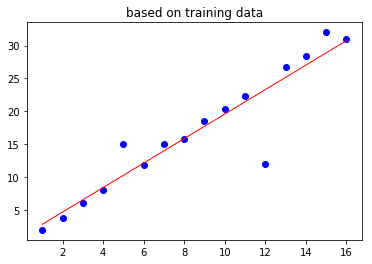

In [8]:
import matplotlib.pyplot as plt

y_train_pred = ridge_regressor.predict(X_train)

plt.figure()
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, y_train_pred, color='red', linewidth=1)
plt.title('based on training data')
plt.show()

In [7]:
import sklearn.metrics as sm

print ("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred_ridge), 2))
print ("Mean squared error =", round(sm.mean_squared_error(y_test,y_test_pred_ridge), 2))
print ("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred_ridge), 2))
print ("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred_ridge), 2))
print ("R2 score =", round(sm.r2_score(y_test, y_test_pred_ridge),2))

Mean absolute error = 4.12
Mean squared error = 21.51
Median absolute error = 3.98
Explain variance score = 0.66
R2 score = -0.62


In [17]:
ridge_regressor.coef_  

array([1.85923857])

In [20]:
1.85923*15

27.88845